# Исследование сервиса аренды самокатов GoFast

## Цель проекта:
Проверить гипотезы, влияющие на увеличение выручки:
1. Установить, тратят ли пользователи с подпиской больше времени на поездки;
2. Проанализировать, превышает ли среднее расстояние, которое проезжают пользователи за одну поездку, оптимальное расстояние с точки зрения износа;
3. Выявить, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
4. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 10%;
5. Оценить вероятность того, что уведомление от отдела маркетинга откроют не более 399,5 тыс. пользователей.

    
<b>Этапы выполнения:</b> 
1. Загрузка данных, анализ общей информации;
2. Предобработка данных: удаление и замена пропусков и дубликатов, преобразование типов данных;
3. Исследовательский анализ данных: описание и визуализация общей информацим о пользователях и поездках:
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.
4. Объединение данных из нескольких таблиц;
5. Подсчёт выручки;
6. Проверка гипотез;
4. Формирование общего вывода.
    
<b>Описание данных:</b> 

Информация о пользователях (users_go.csv):
* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

Информация о поездках (rides_go.csv):
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

Информация о подписках (subscriptions_go.csv):
* subscription_type - тип подписки;
* minute_price - стоимость одной минуты поездки по данной подписке;
* start_ride_price - стоимость начала поездки;
* subscription_fee - стоимость ежемесячного платежа.


#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
#загружаем данные о пользователях


In [3]:
#загружаем данные о поездках


In [4]:
#загружаем данные о подписках


In [5]:
#смотрим первые 10 строк в таблие с пользователями
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
#смотрим общую информацию о данных в таблице с пользователями 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице с пользователями содержится информация о 1565 пользователях, на первый взгляд пропусков в таблице нет, подробнее проверим дальше. Типы данных соответствуют ожиданиям. 

In [7]:
#смотрим первые 10 строк в таблие с поездками
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
#смотрим общую информацию о данных в таблице с поездками 
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В таблице с поездками содержится информация о 18068 поездок, на первый взгляд пропусков в таблице нет, подробнее проверим дальше. Тип данных для столцба с датой поменяли при загрузке данных. 

In [9]:
#смотрим таблицу с подписками
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Мы загрузили информацию о пользователях (1565), поездках (18068) и подписках (2). 
Проведем предобработку данных в следующем шаге. 

#### Шаг 2. Предобработка данных

In [10]:
# поскольку данные о поездках у нас только за 2021 год, то добавим в таблицу только номер месяца, без указания года 
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [11]:
# проверяем
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие пропущенных значений и дубликатов в датафреймах. 

In [12]:
#проверяем пропуски и дубли в данных о пользователях 
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
users.duplicated().sum()

31

In [14]:
#удаляем дубликаты 
users = users.drop_duplicates().reset_index()

In [15]:
#проверяем
users.shape

(1534, 6)

In [16]:
#проверяем пропуски и дубли в данных о поездках 
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
rides.duplicated().sum()

0

Мы добавили в таблицу с поездками информацию о месяце, в котором совершена поездка и удалили дубликаты в таблице с пользоватлями. Другмх дублей или пропусков в данных нет. 

#### Шаг 3. Исследовательский анализ данных

In [18]:
#посмотрим, пользователи из каких городов встречаются в данных 
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [19]:
#посмотрим, в каком городе самокаты популярнее и здесь же определим средний возраст пользователей
users_city_table = users.pivot_table(index='city',  values='age', aggfunc=('count', 'mean'))
users_city_table.sort_values(by='count', ascending = False)

,count,mean
city,,
Пятигорск,219.0,24.716895
Екатеринбург,204.0,24.955882
Ростов-на-Дону,198.0,24.545455
Краснодар,193.0,25.290155
Сочи,189.0,24.507937
Омск,183.0,25.382514
Тюмень,180.0,24.638889
Москва,168.0,25.267857


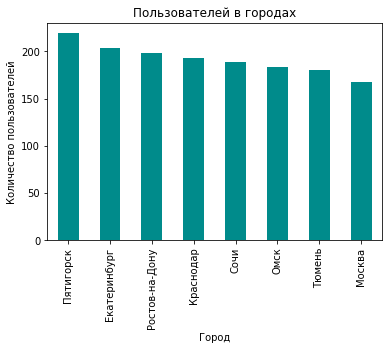

In [20]:
#посмотрим на графике распределение пользователей по городам
a = users.groupby(by='city')['user_id'].count().sort_values(ascending=False)
a.plot(
    kind='bar',
    title='Пользователей в городах',
    xlabel='Город',
    ylabel='Количество пользователей',
    color='darkcyan'
);

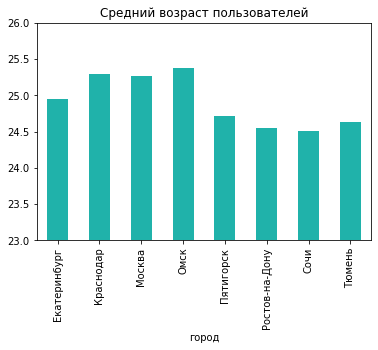

In [21]:
#посмотрим на графике средний возраст пользователей
users_city_table['mean'].plot(
    kind='bar',
    title='Средний возраст пользователей',
    xlabel='город',
    ylim=(23, 26),
    color='lightseagreen'
);

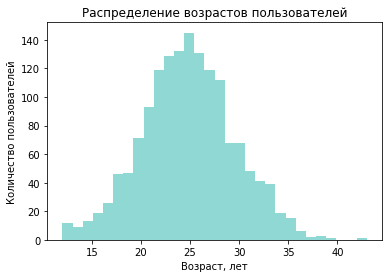

In [22]:
users['age'].plot(
    kind='hist',
    title='Распределение возрастов пользователей',
    color='lightseagreen',
    bins=30,
    alpha=0.5
)
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей');

In [23]:
#а какой средний возраст вне зависимости от города? 
round(users['age'].mean(), 1)

24.9

In [24]:
users[(users['age'] < 15) | (users['age'] > 35)]['age'].count() / users['age'].count()

0.02216427640156454

Больше всего в выборке пользоователей в Пятигорске, меньше всего - в Москве. \
Самые молодые пользователи сервиса живут в Ростове-на-Дону, а самые взрослые - в Омске. Хотя разница межу ними незначительна - всего 0,6 лет. 

Средний возраст пользователей - 24,9 лет. Молодых пользователей (до 15 лет) и взрослых (старше 35) - всего 2%. 

In [25]:
#Посмотрим, где пользователи чаще используют подписку
users_sub_table = users.pivot_table(index='city', columns='subscription_type', values='user_id', aggfunc='count')
users_sub_table['share'] = users_sub_table['ultra'] / (users_sub_table['free']+ users_sub_table['ultra'])*100
users_sub_table

subscription_type,free,ultra,share
city,,,
Екатеринбург,112,92,45.098039
Краснодар,112,81,41.968912
Москва,84,84,50.000000
Омск,92,91,49.726776
Пятигорск,125,94,42.922374
Ростов-на-Дону,109,89,44.949495
Сочи,103,86,45.502646
Тюмень,98,82,45.555556


In [26]:
#а какая общая доля подписок?
users_sub_table['ultra'].sum() / users['user_id'].count()

0.4556714471968709

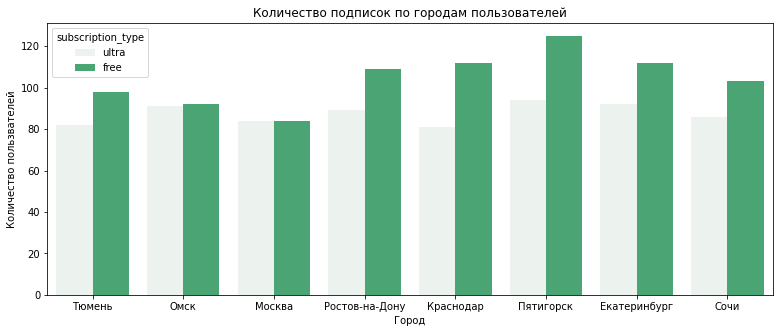

In [27]:
#посмотрим на графике распределение пользователей с подпиской и без в каждом городе
plt.figure(figsize=(13, 5))
ax = sns.countplot(x='city', data=users, hue="subscription_type", color='mediumseagreen')
plt.xlabel('Город')
plt.ylabel('Количество пользвателей')
plt.title('Количество подписок по городам пользователей')
plt.show()

Чаще всего подпиской пользуются в Москве -  ровно 50% пользователей. Реже всего покупают подписку в Краснодаре - 42% пользователей. 

Перейдем к анализу данных о поездках. Проанализируем, на какое расстояние ездят пользователи за одну поездку и ее среднее время. 

In [28]:
#найдем среднее расстояние, которое проезжают пользователи, и среднее врем поездки
print('Cреднее расстояние, которое проезжают пользователи:', round(rides['distance'].mean(), 1), 'метров')
print('Cреднее время поездки:', round(rides['duration'].mean(), 1), 'минут')

Cреднее расстояние, которое проезжают пользователи: 3070.7 метров
Cреднее время поездки: 17.8 минут


In [29]:
#а с какой средней скоростью ездят самокаты?
print('Средняя скорость самоката: ', round((rides['distance'].mean() / rides['duration'].mean()) /16.667, 1), 'км/ч')

Средняя скорость самоката:  10.3 км/ч


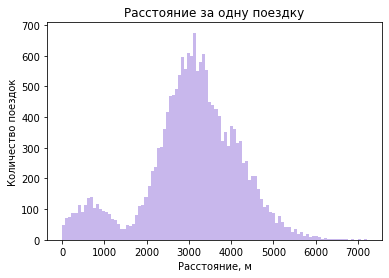

In [30]:
#посмотрим, как распреляются данные по расстоянию
rides['distance'].plot(
    kind='hist',
    title='Расстояние за одну поездку',
    color='mediumpurple',
    bins=100,
    alpha=0.5
)
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок');

Распределение было бы похоже на нормальное, если исключить всплеск около 0. 
Предположительно, поездки с около нулевым временем связаны со знакомством пользователей с самокатом. Посмотрим, сколько поездок  в выборке до 100 метров.


In [31]:
rides[rides['distance'] < 100]['distance'].count()

78

In [32]:
#выведем первые 15 строк из этих 78 - что внутри?
rides[rides['distance'] < 100].head(15)

,user_id,distance,duration,date,month
6611,707,28.793204,14.143966,2021-09-12,9
6691,712,23.963062,2.053251,2021-11-22,11
6816,721,62.568138,7.178766,2021-09-25,9
6850,724,30.473763,3.166221,2021-05-09,5
7367,760,54.724068,8.164172,2021-10-13,10
7389,762,35.061903,7.087655,2021-05-27,5
7595,779,83.977452,3.419887,2021-09-10,9
7841,796,7.097072,10.026614,2021-11-26,11
8324,835,12.233115,4.034952,2021-09-19,9
8658,861,6.784447,6.015656,2021-07-21,7


Данные похожи на нормальные, без ошибки в сборе статистике. Пользователи разные, как и даты. \
Оставляем гипотезу о том, что это "знакомство" с самокатом - короткие поездки с небольшим временем.

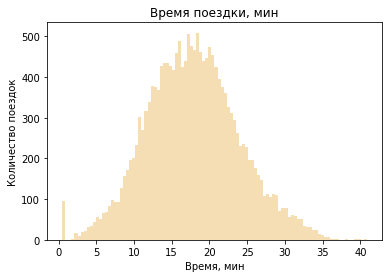

In [33]:
#посмотрим, как распреляются данные по времени поездки
rides['duration'].plot(
    kind='hist',
    title='Время поездки, мин',
    color='wheat',
    bins=100
)
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок');

In [34]:
#проверим, сколько поездок меньше минуты 
rides[rides['duration'] < 1]['duration'].count()

95

In [35]:
for t in rides[rides['duration'] == 0.5]:
    rides[rides['duration'] == 0.5] = rides['duration'].median()

Вот и причина пика около нуля - 95 поездок заполнены странным временем - 0,5, при разном расстоянии.
Такие данные вряд ли могут встретиться в действительности. Проехать 4-5 км за 0,5 мин невозмоно, если на самокате нет кустарной реактивной тяги. При расчете стоимости такие данные будут мешать, приравнивая стоимость поездки в несколько км к стоимости всего одной минуты и занижая общий результат. Доля таких данных составляет 0.5% от всех поездок, заменим эти значения медианой по времени поездки.

Выводы:
1. Больше всего в выборке пользоователей в Пятигорске, меньше всего - в Москве;
2. Самые молодые пользователи сервиса живут в Ростове-на-Дону, а самые взрослые - в Омске;
3. Средний возраст пользователей - 24,9 лет;
4. В среднем 45,6% пользователей имеют подписку;
5. Cреднее расстояние, которое проезжают пользователи: 3 км;
6. Cреднее время поездки: 18 минут.

В данных мы заменили значения времени поездки 0,5 мин на медиану времени, т.к. предположительно, есть ошибка в сборе данных (расстояние больше 4 км нельзя проехать за 0,5 мин). 

#### Шаг 4. Объединение данных

In [36]:
#постепенно объединяем таблицы. Начнем с поездок ис пользователей
table = rides.merge(users, on='user_id', how='left')

In [37]:
#добавим информацию о стоимости поездок по подписке
data = table.merge(subscriptions, on='subscription_type', how='left')

In [38]:
data.shape

(18068, 13)

In [39]:
#Посмотрим, что получилось
data.head()

,user_id,distance,duration,date,month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1.0,4409.919140,25.599769,2021-01-01 00:00:00,1.0,0.0,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
1,1.0,2617.592153,15.816871,2021-01-18 00:00:00,1.0,0.0,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
2,1.0,754.159807,6.232113,2021-04-20 00:00:00,4.0,0.0,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
3,1.0,2694.783254,18.511000,2021-08-11 00:00:00,8.0,0.0,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0
4,1.0,4028.687306,26.265803,2021-08-28 00:00:00,8.0,0.0,Кира,22.0,Тюмень,ultra,6.0,0.0,199.0


In [40]:
#создадим датафрейм с данными о пользователях без подписки 
data_free = data[data['subscription_type'] == 'free']
data_free.shape

(11473, 13)

In [41]:
#создадим датафрейм с данными о пользователях с подпиской 
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.shape

(6500, 13)

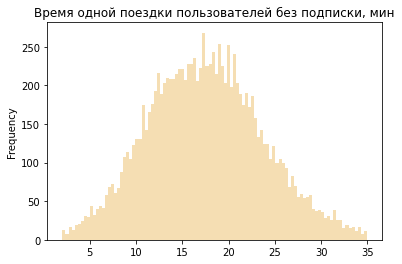

Cреднее время поездки пользователей без подписки: 17.5 минут


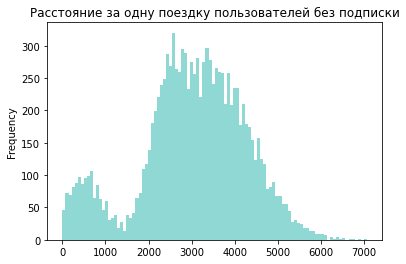

Cреднее расстояние, которое проезжают пользователи без подписки: 3028.4 метров


In [42]:
#посмотрим на время и расстояние поездок для пользователей без подписок 

#время 
data_free['duration'].plot(
    kind='hist',
    title='Время одной поездки пользователей без подписки, мин',
    color='wheat',
    bins=100
)
plt.show()

print('Cреднее время поездки пользователей без подписки:', round(data_free['duration'].mean(), 1), 'минут')

#расстояние
data_free['distance'].plot(
    kind='hist',
    title='Расстояние за одну поездку пользователей без подписки',
    color='lightseagreen',
    bins=100,
    alpha=0.5
)
plt.show()
print('Cреднее расстояние, которое проезжают пользователи без подписки:', round(data_free['distance'].mean(), 1), 'метров')

In [43]:
print('Доля коротких поездок (до 1 км) для пользователей без подписки составляет ', 
      round(data_free[data_free['distance'] < 1000]['distance'].count() / data_free.shape[0] * 100, 1), '% от всех поездок')

Доля коротких поездок (до 1 км) для пользователей без подписки составляет  9.7 % от всех поездок


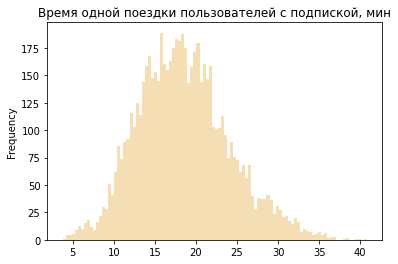

Cреднее время поездки пользователей с подпиской: 18.5 минут


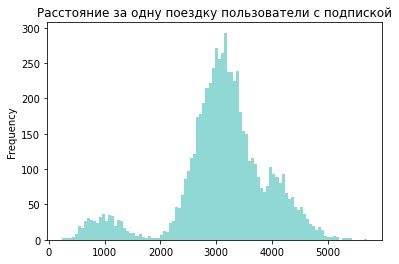

Cреднее расстояние, которое проезжают пользователи с подпиской: 3115.4 метров


In [44]:
#посмотрим на время и расстояние поездок для пользователей с подпиской

#время 
data_ultra['duration'].plot(
    kind='hist',
    title='Время одной поездки пользователей с подпиской, мин',
    color='wheat',
    bins=100
)
plt.show()

print('Cреднее время поездки пользователей с подпиской:', round(data_ultra['duration'].mean(), 1), 'минут')

#расстояние
data_ultra['distance'].plot(
    kind='hist',
    title='Расстояние за одну поездку пользователи с подпиской',
    color='lightseagreen',
    bins=100,
    alpha=0.5
)
plt.show()
print('Cреднее расстояние, которое проезжают пользователи с подпиской:', round(data_ultra['distance'].mean(), 1), 'метров')

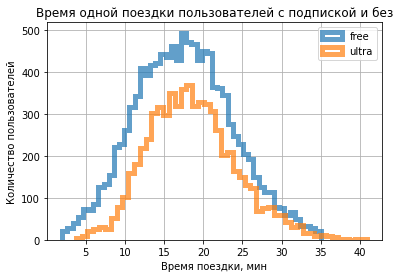

In [45]:
#совместим графики для наглядности 
#Сначала по времени поездки
ax = data_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='free',
)
data_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество пользователей')
plt.xlabel('Время поездки, мин')
plt.title('Время одной поездки пользователей с подпиской и без');

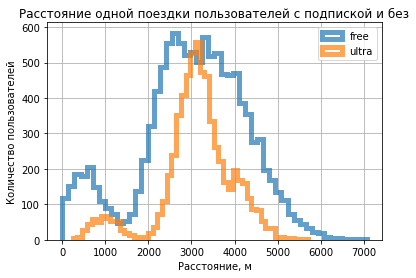

In [46]:
#затем по расстоянию
ax = data_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='free',
)
data_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние, м')
plt.title('Расстояние одной поездки пользователей с подпиской и без');

In [47]:
print('Доля коротких поездок (до 1 км) для пользователей с подпиской составляет ', 
      round(data_ultra[data_ultra['distance'] < 1000]['distance'].count() / data_ultra.shape[0] * 100, 1), '% от всех поездок')

Доля коротких поездок (до 1 км) для пользователей с подпиской составляет  4.0 % от всех поездок


In [48]:
print('Доля долгих поездок (больше 35 миин) для пользователей с подпиской составляет ', 
      round(data_ultra[data_ultra['duration'] > 35]['duration'].count() / data_ultra.shape[0] * 100, 1), '% от всех поездок')

Доля долгих поездок (больше 35 миин) для пользователей с подпиской составляет  0.4 % от всех поездок


Вывод: 
1. Пользователи с подпиской ездят дольше по времени и дальше по расстоянию, чем пользователи без подписки;
2. Доля "коротких" поездок (до 1 км) у пользователей без подписок больше, чем в два раза, превышает долю коротких поездок пользователей с подпиской;
3. Пользователи без подписок не ездят на самокате дольше 35 минут, в отичие от пользователей с подписками (хотя доля таких поездок тоже невелика - всего 0.4%)

#### Шаг 5. Подсчёт выручки

Найдем для каждого пользователя за каждый месяц
* суммарное расстояние;
* количество поездок;
* суммарное время;
* помесячную выручку.

In [49]:
#добавим расчетный столбец для подсчета количества поездок
data['for_count'] = 1

In [50]:
#округлим время поездки до целого
data['duration'] = np.ceil(data['duration']) 

In [51]:
#создадим сводную таблицу 
data_gr = data.pivot_table(
    index=['user_id', 'month'], 
    values=['subscription_type', 'distance', 'duration', 'for_count', 'minute_price', 'start_ride_price', 'subscription_fee'], 
    aggfunc={'subscription_type': 'first', 'distance': sum, 'duration': sum, 'for_count': sum, 'minute_price': 'first', 'start_ride_price': "first", 'subscription_fee': "first"} 
)


#добавим столбец с расчетной выручкой
data_gr['revenue'] = data_gr['duration']*data_gr['minute_price'] + data_gr['for_count']*data_gr['start_ride_price'] + data_gr['subscription_fee']

data_gr.head(10)

distance  duration  for_count  minute_price  \
user_id month                                                    
1.0     1.0     7027.511294      42.0          2           6.0   
        4.0      754.159807       7.0          1           6.0   
        8.0     6723.470560      46.0          2           6.0   
        10.0    5809.911100      32.0          2           6.0   
        11.0    7003.499363      56.0          3           6.0   
        12.0    6751.629942      28.0          2           6.0   
2.0     3.0    10187.723006      63.0          3           6.0   
        4.0     6164.381824      40.0          2           6.0   
        6.0     3255.338202      14.0          1           6.0   
        7.0     6780.722964      48.0          2           6.0   

               start_ride_price  subscription_fee subscription_type  revenue  
user_id month                                                                 
1.0     1.0                 0.0             199.0             ultra    451.0  
        4.0                 0.0             199.0             ultra    241.0  
        8.0                 0.0             199.0             ultra    475.0  
        10.0                0.0             199.0             ultra    391.0  
        11.0                0.0             199.0             ultra    535.0  
        12.0                0.0             199.0             ultra    367.0  
2.0     3.0                 0.0             199.0             ultra    577.0  
        4.0                 0.0             199.0             ultra    439.0  
        6.0                 0.0             199.0             ultra    283.0  
        7.0                 0.0             199.0             ultra    487.0

In [52]:
#интересно, какую максимальную выручку принес пользователь?
data_gr['revenue'].max()

1444.0

In [53]:
#посмотрим на его поездки
data_gr[data_gr['revenue'] == data_gr['revenue'].max()]

,,distance,duration,for_count,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
user_id,month,,,,,,,,
1471.0,1.0,23098.193122,143.0,6,8.0,50.0,0.0,free,1444.0


Любопытно, что самую большую выручку принес пользователь без подписки, проехавший более 140 минут и более 23 км.
Надо предложить ему подписку -  он бы сэкономил за этот месяц около 387 рублей. 

Мы посчитали выручку для каждого пользователя в зависимости от наличия подписки, его общее расстояние и время за каждый месяц.

#### Шаг 6. Проверка гипотез

1. Проверяем, тратят ли пользователи с подпиской больше времени на поездки

In [54]:
#найдем среднее время для каждого типа пользователей - с подпиской и без 
print('Среднее время одной поездки пользователей с подпиской -',
    round(data[data['subscription_type'] == 'ultra']['duration'].sum() / data[data['subscription_type'] == 'ultra']['duration']
    .count(),1),
    'минут'
)
print('Среднее время одной поездки пользователей без подписки -',
    round(data[data['subscription_type'] == 'free']['duration'].sum() / data[data['subscription_type'] == 'free']['duration']
    .count(),1),
    'минут'
)

Среднее время одной поездки пользователей с подпиской - 19.0 минут
Среднее время одной поездки пользователей без подписки - 18.0 минут


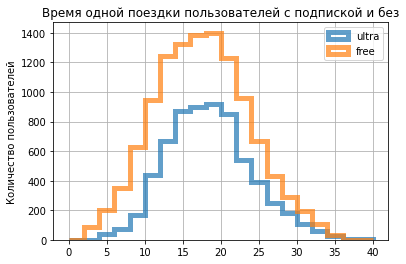

In [55]:
ax = data_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 40),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='ultra',
)
data_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 40),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='free',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество пользователей')
plt.title('Время одной поездки пользователей с подпиской и без');


На гарфике видно, что пользователи с подпиской и без примерно равномерно распределяются по времени поездки. \
При этом среднее время поездки у пользователей с подпиской все же  больше на минуту, чем пользователей без подписки.

Проверим с помощью статистичекого теста эту гипотезу. \
Т.к. данные распределены нормально, судя по графикам, и совлкупности друг от друга не зависят, можем проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. \
За нулевую гипотезу примем предположение, что среднее время поездки у пользователей с подпиской и без равны. \
Альтернативная - пользователи с подпиской тратят больше времени на поездки, чем без подписки. 

In [56]:
#уровень статистической значимости возьмем за 5%
alpha = 0.05 

results = st.ttest_ind(data[data['subscription_type'] == 'ultra']['duration'], data[data['subscription_type'] == 'free']['duration'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


Т.о. делаем вывод: гипотезу о равенстве времени поездок пользователей с подпиской и без можем отвергнуть. 

2. Проверяем, превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, 3130 метров.

In [57]:
#посчитаем долю поездок дальше 3130 м
data_ultra[data_ultra['distance'] > 3130]['distance'].count() / data_ultra['distance'].count()

0.5153846153846153

In [58]:
#посмотрим, как обстоят дела с дальними поездками у пользователей без подписок
data_free[data_free['distance'] > 3130]['distance'].count() / data_free['distance'].count() 

0.49080449751590693

In [59]:
#какой средний процент дальних поездок для всех пользователей?
data[data['distance'] > 3130]['distance'].count() / data['distance'].count() 

0.49706663714854993

Почти половина поездок на самокатах превышает оптимальное расстояние с точки зрения износа в 3130 м:
* пользователи с подписками чуть больше любят дальние поездки - их 51,5%;
* пользователи без подписок ездят дальше 3130 м в 49,1% случаев.

Эту гипотезу тоже можно проверить с помощью статистического теста. \
Поскольку менеджерам важно получить вероятность превышения среднего расстояния в 3130 метров, используем метод проверки односторонней гипотезы. 

Нулевая гипотеза будет сформулирована как: среднее расстояние, пройденное пользователем с подпиской, равно 3130 метров. \
Альтернаятивная: среднее расстояние, пройденное пользователем с подпиской, больше 3130 метров.

In [60]:
data_ultra['distance']

0       4409.919140
1       2617.592153
2        754.159807
3       2694.783254
4       4028.687306
           ...     
6495    3973.046497
6496    3288.702563
6497    3076.159348
6498    4707.845501
6499    3202.890770
Name: distance, Length: 6500, dtype: float64

In [61]:
wear_dist = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    data_ultra['distance'], 
    wear_dist,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Получается, что почти 92% поездок лежат в области до 3130 м. Тогда, действительно, гипотеза не может быть отвержена   пользу предыдущих выводов. Получается из теста, что среднее расстояние, пройденное пользователем с подпиской, чаще всего бывает до 3130 м.

3. Проверяем, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [62]:
data_gr_month = data_gr.pivot_table(index='month', columns = 'subscription_type',  aggfunc='sum')['revenue']
data_gr_month.columns = ['free', 'ultra'] 
data_gr_month['difference'] = data_gr_month['ultra'] - data_gr_month['free']
data_gr_month

,free,ultra,difference
month,,,
1.0,193328.0,144108.0,-49220.0
2.0,165392.0,124572.0,-40820.0
3.0,186576.0,142608.0,-43968.0
4.0,185192.0,137318.0,-47874.0
5.0,187566.0,149235.0,-38331.0
6.0,191854.0,143834.0,-48020.0
7.0,184632.0,143466.0,-41166.0
8.0,186652.0,138534.0,-48118.0
9.0,193352.0,129337.0,-64015.0


Общая выручка от пользователей с подпиской меньше, чем от пользователей без подписки. \
Но и самих пользователей без подписки больше, чем пользователей с подпиской. Посчитаем среднемесячную выручку в зависимости от количества пользователей.

In [63]:
#посчитаем количество пользователей с подпиской и без по месяцам
data_user = data.pivot_table(index='month', values='user_id', columns='subscription_type', aggfunc='count')
data_user.columns = ['free_user', 'ultra_user']
data_user

,free_user,ultra_user
month,,
1.0,992,584
2.0,860,468
3.0,972,561
4.0,948,551
5.0,955,597
6.0,983,565
7.0,948,574
8.0,970,540
9.0,996,515


In [64]:
#добавим эти расчеты в табличу с выручкой 
data_gr_month['free_user'] = data_user['free_user']
data_gr_month['ultra_user'] = data_user['ultra_user']

In [65]:
#посчитаем среднемесячнцю выручку пользователей с подпиской и без 
data_gr_month['avg_rev_free'] = data_gr_month['free'] / data_gr_month['free_user']
data_gr_month['avg_rev_ultra'] = data_gr_month['ultra'] / data_gr_month['ultra_user']
data_gr_month

,free,ultra,difference,free_user,ultra_user,avg_rev_free,avg_rev_ultra
month,,,,,,,
1.0,193328.0,144108.0,-49220.0,992,584,194.887097,246.760274
2.0,165392.0,124572.0,-40820.0,860,468,192.316279,266.179487
3.0,186576.0,142608.0,-43968.0,972,561,191.950617,254.203209
4.0,185192.0,137318.0,-47874.0,948,551,195.350211,249.215971
5.0,187566.0,149235.0,-38331.0,955,597,196.404188,249.974874
6.0,191854.0,143834.0,-48020.0,983,565,195.171923,254.573451
7.0,184632.0,143466.0,-41166.0,948,574,194.759494,249.940767
8.0,186652.0,138534.0,-48118.0,970,540,192.424742,256.544444
9.0,193352.0,129337.0,-64015.0,996,515,194.128514,251.139806


In [66]:
print('Среднемесячная выручка от пользователей с подпиской:', data_gr_month['avg_rev_ultra'].mean())
print('Среднемесячная выручка от пользователей без подписки:', data_gr_month['avg_rev_free'].mean())

Среднемесячная выручка от пользователей с подпиской: 253.25073992002262
Среднемесячная выручка от пользователей без подписки: 194.2286321243719


Нулевая гипотеза: средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписок. \
Альтернативная: средняя выручка от пользователей с подпиской больше, чем от пользователей без подписок. 

In [67]:
#проведем t-test для сравнения: равны ли выручки от двух категорий пользователей

#уровень значимости выберем 5%
alpha = 0.05

#в качестве сравниваемого параметра выберем выручку по категориям пользователей
results = st.ttest_ind(data_gr[data_gr['subscription_type'] == 'ultra']['revenue'], 
                       data_gr[data_gr['subscription_type'] == 'free']['revenue'], 
                       alternative = 'greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Тест показывает, что средние выручки от двух групп пользователей не равны. \
Действительно, пользователи с подпиской в среднем тратят на 23% больше, чем пользователи без подписки. \
При этом за счет количества пользователей с подпиской, которых меньше, чем пользователей без подписки, общая выручка от пользователей с попиской меньше. 

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: следовало бы провести ttest_rel, который подходит для проверки гипотез о равенстве среднего генеральных совокупностей до и после изменения.

Вывод: пользователи с подпиской ездят дольше (на 1 мин), дальше (доля поездок на расстояние свыше 3,1 км больше на 3%) и тратят больше (в среднем за одну поездку на 23%), чем пользователи без подписки.

#### Шаг 7. Распределения

Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план по продлению 100 подписок была примерно 5 % (вероятность продления по ранее проведенной акции - 10%).

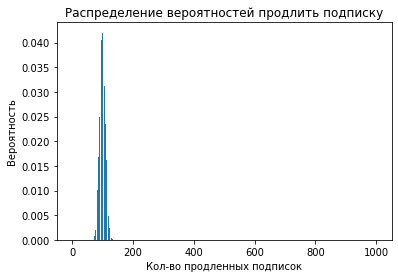

In [68]:
#начнем с 1000 промокодов
n = 1000
# вероятность продления подписки по промокоду
p = 0.1

# создаем список distr, в котором будем хранить значения распределения
distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial (n -k))
    prob = choose * p**k * (1-p)**(n-k)
    distr.append(prob)
    
# построение гистограммы распределения вероятностей
plt.bar(range(0, n + 1), distr);
plt.title('Распределение вероятностей продлить подписку')
plt.xlabel('Кол-во продленных подписок')
plt.ylabel('Вероятность');

In [69]:
# задаём параметры биномиального распределения
n = 1170
p = 0.1

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста справа от 100 
result = 1- distr.cdf(100)
print(result)

0.9512064034722397


Получается, чтобы выполнить план на 95% отделу маркетинга нужно разослать как минимум 1170 промокодов. 

Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

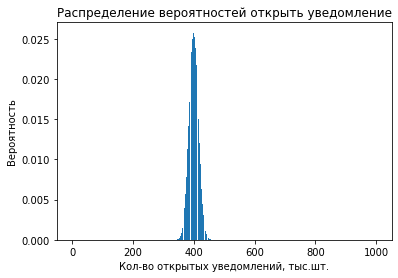

In [70]:
#уменьшим кол-во экспертиментов пропорционально искомому значению - в 1000 раз 
n = 1000
# вероятность открыть уведомление 
p = 0.4

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial (n -k))
    prob = choose * p**k * (1-p)**(n-k)
    distr.append(prob)
    
# построение гистограммы распределения вероятностей
plt.bar(range(0, n + 1), distr);
plt.title('Распределение вероятностей открыть уведомление')
plt.xlabel('Кол-во открытых уведомлений, тыс.шт.')
plt.ylabel('Вероятность');

In [71]:
#задаем нормальное распределение с этими параметрами
mu = 1000000 * p
sigma = (1000000 * p * (1 - p))**0.5
distr = st.norm(mu, sigma)
result = distr.cdf(399500)
print(result)

0.15371708296369768


In [72]:
mu = 1000000 * p
sigma = (1000000 * p * (1 - p))**0.5
distr = st.norm(mu, sigma)
result = distr.cdf(399500)
print(result)

0.15371708296369768


Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = 15,4%.

# Вывод:

Исследовательский анализ данных показал, что:
1. Больше всего в выборке пользоователей в Пятигорске, меньше всего - в Москве;
2. Самые молодые пользователи сервиса живут в Ростове-на-Дону, а самые взрослые - в Омске;
3. Средний возраст пользователей - 25 лет;
4. В среднем 45,6% пользователей имеют подписку;
5. Cреднее расстояние, которое проезжают пользователи: 3 км;
6. Cреднее время поездки: 18 минут.

Пользователи с подпиской выгоднее для сервиса, чем пользователи без подписки - такие пользователи:
1. Ездят дольше по времени (на 1 мин);
2. Тратят больше (в среднем за одну поездку на 23%);
3. Самокаты при их поездках меньше подвержены износу (91% поездок до 3130 м).

Увеличение продаж: 
1. Чтобы выполнить план на 95% в рамках акции с раздачей промокодов на один бесплатный месяц подписки отделу маркетинга нужно разослать как минимум 1170 промокодов;
2. При рассылке 1 млн уведомлений вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, равна 15,4%.